In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from nltk.tokenize import word_tokenize

# download de stopwords de nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Desktop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('twitter_whey_V3.csv', sep=',')
df

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,kamii,@kami_whey,2022-06-15T22:28:20.000Z,"kamii\n@kami_whey\n·\nJun 15, 2022","i will not give context, i just find this imag...",NaN,1,NaN,3,['https://pbs.twimg.com/media/FVU7ZmGWAAIqepU?...,https://twitter.com/kami_whey/status/153720035...
1,tia feri.,@feristhii,2022-06-15T21:29:34.000Z,"tia feri.\n@feristhii\n·\nJun 15, 2022",Apenas um treino usando uma gostosa,NaN,3,58,869,['https://pbs.twimg.com/media/FVUuIaeWUAA13vp?...,https://twitter.com/feristhii/status/153718557...
2,Monty Riches,@MontyRiches,2022-06-15T22:34:27.000Z,"Monty Riches\n@MontyRiches\n·\nJun 15, 2022","MONTY'S APE WATCH Mega ""UNDER 10 $SOL"" Editi...",🚨 🦧 🚨 💪 🦍,4,3,19,['https://pbs.twimg.com/media/FVU8-5cXsAEsOqc?...,https://twitter.com/MontyRiches/status/1537201...
3,Walk Like an Egyptian Bot,@egyptian_bot,2022-06-15T22:10:49.000Z,Walk Like an Egyptian Bot\n@egyptian_bot\n·\nJ...,Foreign types with the hookah pipes say ay oh ...,NaN,NaN,NaN,NaN,[],https://twitter.com/egyptian_bot/status/153719...
4,thomas the gain,@thomasphall,2022-06-15T20:49:42.000Z,"thomas the gain\n@thomasphall\n·\nJun 15, 2022",I use to have my autocorrect change “way” to “...,🚂 😂,2,NaN,NaN,[],https://twitter.com/thomasphall/status/1537175...
...,...,...,...,...,...,...,...,...,...,...,...
8413,Ella.,@ellavlr7,2023-06-01T22:56:06.000Z,Ella.\n@ellavlr7\n·\nJun 1,treino assim pra quem não sabe,NaN,26,61,242,['https://pbs.twimg.com/ext_tw_video_thumb/166...,https://twitter.com/ellavlr7/status/1664405488...
8414,root beer,@harms_whey,2023-06-02T23:36:45.000Z,root beer\n@harms_whey\n·\nJun 2,FELLOW GAYMERS RISE UP,🤠,NaN,1,5,[],https://twitter.com/harms_whey/status/16647781...
8415,Whey Standard,@Whey_standard,2023-06-08T23:47:50.000Z,Whey Standard\n@Whey_standard\n·\nJun 8,Shit is about to get incredibly annoying,NaN,5,NaN,15,[],https://twitter.com/Whey_standard/status/16669...
8416,Goleada da Zoeira,@goleadadazoeira,2023-06-10T13:36:54.000Z,Goleada da Zoeira\n@goleadadazoeira\n·\nJun 10,O TREINO INOVADOR DO CORINTHIANS,NaN,82,185,"1,631",['https://pbs.twimg.com/ext_tw_video_thumb/166...,https://twitter.com/goleadadazoeira/status/166...


In [3]:
# Carregar stopword em ingles
stop_words_en = set(stopwords.words('english'))

# Adiciona stop words adicionais,""
additional_stop_words = ["'s", "oh", "https","’","''","“","...","”","``","1","2","day","go","el","en","pra","la",
                         "hoje","one","games","100"]
stop_words_en.update(additional_stop_words)

# Carregar stopword em português
stop_words_pt = set(stopwords.words('portuguese'))

In [4]:
# Junte todas as reviews em um único texto
twitter_text = ' '.join(df['Embedded_text'].astype(str))

# Tokenize o texto em palavras
tokens = word_tokenize(twitter_text)

# Filtra as palavras para remover stopwords e pontuações
twitter_words = [word.lower() for word in tokens if word.lower() not in stop_words_en and word.lower() not in stop_words_pt and word.lower() not in string.punctuation]

# Conta a frequência das palavras
twitter_word_freq = Counter(twitter_words)

In [5]:
df_wordfreq_twitter = pd.DataFrame.from_dict(twitter_word_freq, orient='index', columns=['Count']).reset_index()
df_wordfreq_twitter.columns = ['Palavra', 'Frequência']
display(df_wordfreq_twitter)
df_wordfreq_twitter.to_csv('df_wordfreq_twitter.csv')

,Palavra,Frequência
0,give,57
1,context,4
2,find,48
3,image,3
4,hot,26
...,...,...
28501,rodolffo,1
28502,bbb,1
28503,falda,1
28504,gaymers,1


In [6]:
df_wordfreq_reddit = df_wordfreq_twitter.sort_values(by=['Frequência']).tail(20)
df_wordfreq_reddit

,Palavra,Frequência
571,dey,191
1097,people,191
662,isolate,194
1155,training,197
1101,new,199
1985,academia,202
112,nutrition,208
140,today,224
1084,time,238
49,powder,245


### Nuvem de palavras

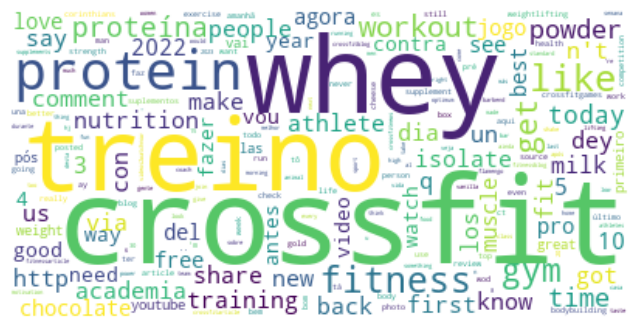

In [8]:
word_freq_dict = df_wordfreq_twitter.set_index('Palavra')['Frequência'].to_dict()

wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()